<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday03052022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm

In [74]:
# Font control
#!wget 'https://github.com/google/fonts/blob/main/ofl/notosans/NotoSans-Regular.ttf?raw=true'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

/content/Cousine-Regular.ttf
/content/NotoSans-Regular.ttf
/content/Avenir.ttc


In [86]:
capacity = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-03/capacity.csv')
#capacity = capacity.sort_values('type')
capacity.loc[14, 'total_gw'] = 0.001
capacity

,type,year,standalone_prior,hybrid_prior,standalone_new,hybrid_new,total_gw
0,Solar,2014,25.052420,0.000000,19.511700,0.000000,44.564120
1,Solar,2015,33.055120,0.000000,23.763492,0.000000,56.818612
2,Solar,2016,36.977478,0.000000,83.332539,0.000000,120.310017
3,Solar,2017,83.578314,0.000000,104.931034,0.000000,188.509348
4,Solar,2018,138.198438,11.556250,115.544645,17.666710,282.966042
5,Solar,2019,155.783796,43.000118,109.784725,58.583096,367.151735
6,Solar,2020,195.560800,95.964300,107.615327,63.304300,462.444727
7,Wind,2014,66.673450,0.000000,29.202450,0.000000,95.875900
8,Wind,2015,65.027285,0.000000,44.562560,0.000000,109.589845
9,Wind,2016,74.751290,0.000000,66.924160,0.000000,141.675450


In [87]:
capacity_t = capacity.pivot('type', 'year', 'total_gw')
capacity_t

year,2014,2015,2016,2017,2018,2019,2020
type,,,,,,,
Coal,3.61980,3.661000,0.875000,0.193000,0.819000,0.050000,0.130700
Gas,145.14108,163.349278,133.375701,110.870468,86.012517,77.206634,74.021700
Nuclear,9.96300,9.554000,2.360200,0.824800,1.229900,3.333500,3.382300
Other,25.40639,13.161853,10.472230,6.233460,6.589435,4.647680,7.912689
Solar,44.56412,56.818612,120.310017,188.509348,282.966042,367.151735,462.444727
Storage,0.00100,7.303140,11.738165,18.882355,29.033424,55.403319,204.466740
Wind,95.87590,109.589845,141.675450,180.174485,232.163190,225.502224,209.138800


/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:328: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


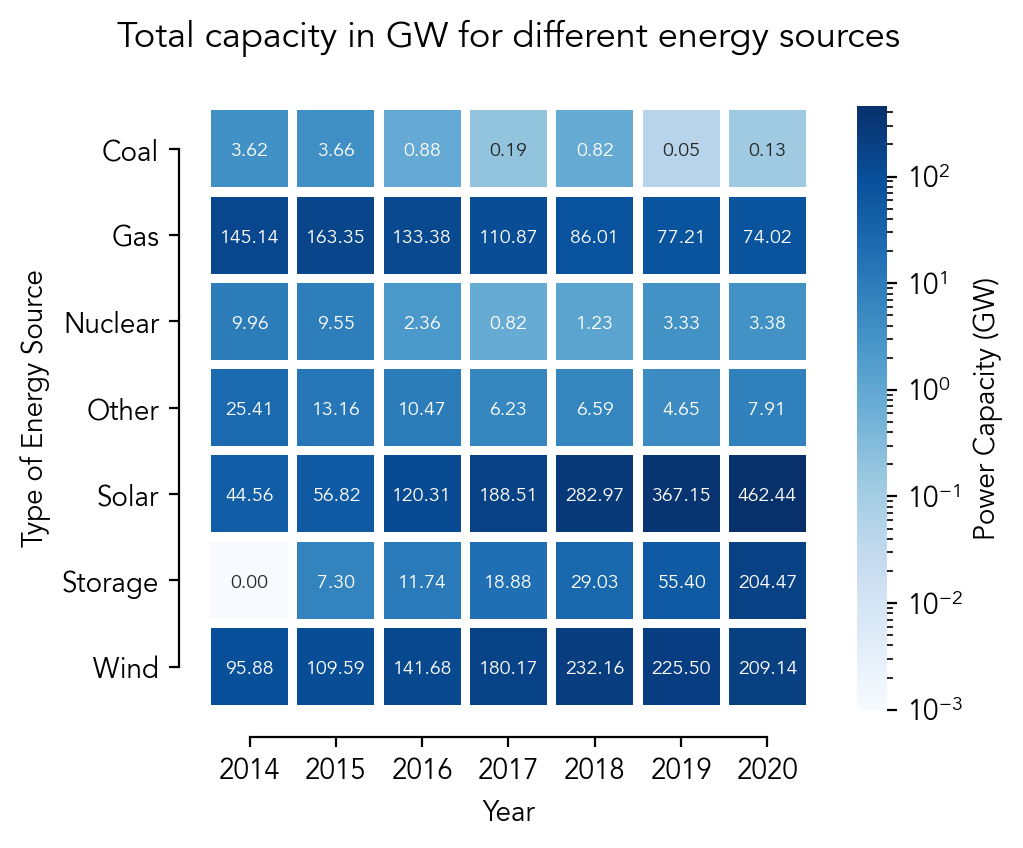

In [99]:
plt.figure(dpi=200, facecolor='w')
capacity_ax = sns.heatmap(data=capacity_t, 
                          annot=True,
                          fmt=".2f",
                          linewidth=3,
                          cmap='Blues',
                          norm=LogNorm(),
                          vmin=-0.01,
                          annot_kws={"size": 7, 
                                     "va": "center_baseline"},
                          cbar_kws={'label': 'Power Capacity (GW)'},
                          )

capacity_ax.set_aspect(1)

#plt.xticks([])
plt.yticks(rotation=0)

plt.xlabel('Year', fontdict={'size': 10})
plt.ylabel('Type of Energy Source', 
           fontdict={'size': 10})
plt.title('Total capacity in GW for different energy sources\n',
          fontdict={'size': 13})

sns.despine(offset=10, trim=True)
#plt.legend()
#plt.savefig('actual_vs_ideal.svg')
plt.show()